In [1]:
source("scripts/multi_align.r")
source("scripts/multi_class.r")

In [2]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [226]:
# cells from 230414_bd391_seurat.r.ipynb
cells = read.csv("230414_seurat_valid_cells.csv")
cells = sapply(cells$X, function(x) strsplit(x, '-')[[1]][1])
#cells = cells["barcode"][,1]


In [148]:
bars = read.table("barcodes/multiseq_barcodes.txt")
bars = bars["V1"][,1]
bars

[1] "GGAGAAGA" "CCACAATG" "TGAGACCT" "GCACACGC" "AGAGAGAG" "TCACAGCA"
 [7] "GAAAAGGG" "CGAGATTC" "GTAGCACT" "CGACCAGC" "TTAGCCAG" "GGACCCCA"

In [150]:
readTable <- MULTIseq.preProcess(R1 = 'fastqs//230322Van_D23-4310_1_sequence.fastq.gz', 
                                 R2 = 'fastqs//230322Van_D23-4310_2_sequence_trimmed.fastq.gz', 
                                 cellIDs = cells, 
                                 cell=c(1,16), umi=c(17,28), tag=c(1,8))

[1] "Reading in R1..."
[1] "Reading in R2..."
[1] "Assembling read table..."


In [151]:
bar.table <- MULTIseq.align(readTable, cells, bars)

Loading required package: stringdist

Warning message:
“package ‘stringdist’ was built under R version 4.2.2”


[1] "Bucketing cell IDs..."
[1] "Bucketing read tables..."
[1] "Aligning bucket #1..."
[1] "2023-04-14 16:20:45 EDT"
[1] "Done aligning bucket #1..."
Time difference of 9.962934 mins
[1] "Aligning bucket #2..."
[1] "2023-04-14 16:30:43 EDT"
[1] "Done aligning bucket #2..."
Time difference of 4.149362 mins


In [153]:
# these numbers look VERY similar to KITE, but KITE is much much faster 
head(bar.table)

,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,Bar10,Bar11,Bar12,nUMI,nUMI_total
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAACCCAAGACAAGCC,7,13,17,20,6,40,3,9,11,17,106,7,256,295
AAACCCAAGACATCCT,8,8,24,15,8,28,5,15,8,15,5,240,379,420
AAACCCAAGAGCATTA,7,12,17,6,6,28,9,14,101,8,3,9,220,248
AAACCCAAGCCGGAAT,8,13,243,13,6,23,7,10,7,10,7,14,361,407
AAACCCACAACAACAA,13,14,17,9,11,24,7,262,19,4,3,6,389,438
AAACCCACAACCAACT,42,16,12,6,5,27,2,6,3,6,4,7,136,154


In [281]:
# reading in barcode table from KITE 
# this allows for all 1-mismatch alignments
# from 230414_bd391_demultiplex.ipynb

bar.table = read.csv("230414_bd391_multiseq_counts_per_cell.csv", row.names=1)
print(dim(bar.table))
head(bar.table)

[1] 81718    12


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCCAAGACAACTA,10,12,16,8,4,27,4,6,7,1,5,7
AAACCCAAGACAAGCC,7,14,17,20,6,40,3,9,11,17,112,8
AAACCCAAGACATCCT,8,9,23,16,8,29,5,15,10,15,5,249
AAACCCAAGACTGAGC,5,12,17,11,2,22,7,11,6,9,6,2
AAACCCAAGAGAGGTA,18,21,12,19,9,40,9,16,14,7,6,13
AAACCCAAGAGCATTA,7,13,18,6,6,29,10,15,106,8,5,10


In [282]:
# limit to cells that pass a minimum UMI count
# in 230414_bd391_cells.ipynb
bar.table = bar.table[intersect(row.names(bar.table), cells),]
dim(bar.table)
head(bar.table)

[1] 15055    12

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCCAAGACAAGCC,7,14,17,20,6,40,3,9,11,17,112,8
AAACCCAAGACATCCT,8,9,23,16,8,29,5,15,10,15,5,249
AAACCCAAGAGCATTA,7,13,18,6,6,29,10,15,106,8,5,10
AAACCCAAGCCGGAAT,7,15,252,13,6,23,7,10,9,10,7,15
AAACCCACAACAACAA,16,15,17,9,11,24,7,263,21,4,5,6
AAACCCACAACCAACT,43,17,12,6,5,28,2,6,4,7,4,8


[1] 263


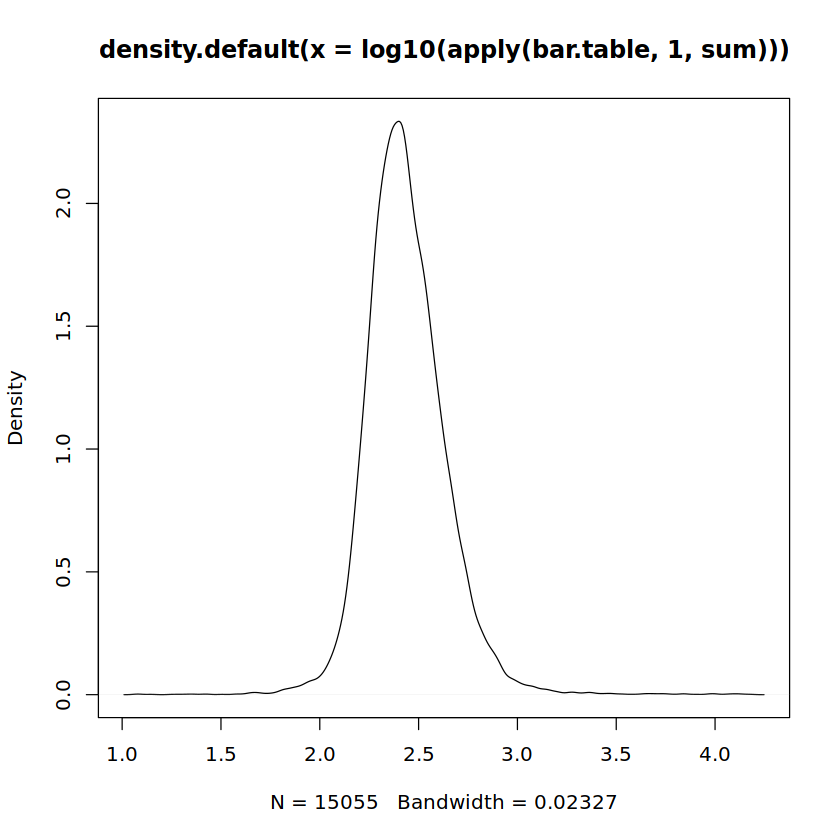

In [253]:
print(median(apply(bar.table,1,sum)))
plot(density(log10(apply(bar.table,1,sum))))

In [ ]:
# ## Visualize barcode space
# bar.tsne <- barTSNE(bar.table[,1:12]) 
# ## Note: Exclude columns 97:98 (assuming 96 barcodes were used) which provide total barcode UMI counts for each cell. 

# for (i in 3:ncol(bar.tsne)) {
#     g <- ggplot(bar.tsne, aes(x = TSNE1, y = TSNE2, color = bar.tsne[,i])) +
#     geom_point() +
#     scale_color_gradient(low = "black", high = "red") +
#     ggtitle(colnames(bar.tsne)[i]) +
#     theme(legend.position = "none") 
#     print(g)
# }

Loading required package: Rtsne

Warning message:
“package ‘Rtsne’ was built under R version 4.2.1”


[1] 0.01
[1] 0.03
[1] 0.05
[1] 0.07
[1] 0.09
[1] 0.11
[1] 0.13
[1] 0.15
[1] 0.17
[1] 0.19
[1] 0.21
[1] 0.23
[1] 0.25
[1] 0.27
[1] 0.29
[1] 0.31
[1] 0.33
[1] 0.35
[1] 0.37
[1] 0.39
[1] 0.41
[1] 0.43
[1] 0.45
[1] 0.47
[1] 0.49
[1] 0.51
[1] 0.53
[1] 0.55
[1] 0.57
[1] 0.59
[1] 0.61
[1] 0.63
[1] 0.65
[1] 0.67
[1] 0.69
[1] 0.71
[1] 0.73
[1] 0.75
[1] 0.77
[1] 0.79
[1] 0.81
[1] 0.83
[1] 0.85
[1] 0.87
[1] 0.89
[1] 0.91
[1] 0.93
[1] 0.95
[1] 0.97
[1] 0.99


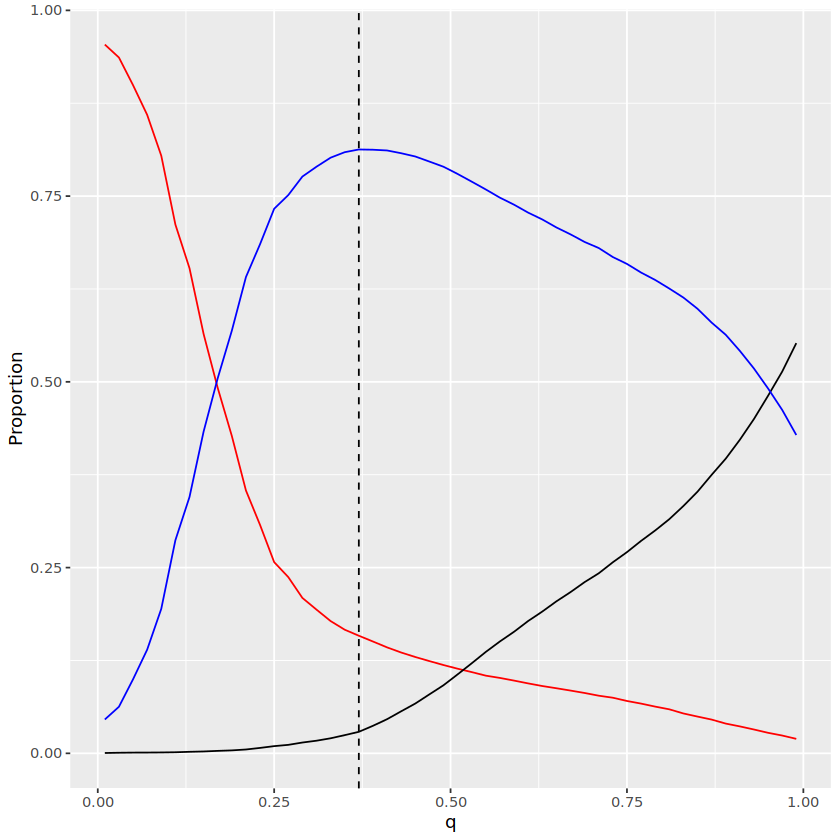

In [283]:
## Round 1 -----------------------------------------------------------------------------------------------------
## Perform Quantile Sweep
bar.table.full <- bar.table[,1:12]
bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

## Finalize round 1 classifications, remove negative cells
round1.calls <- classifyCells(bar.table, q=findQ(threshold.results1$res, threshold.results1$extrema))
neg.cells <- names(round1.calls)[which(round1.calls == "Negative")]


## Identify ideal inter-maxima quantile to set barcode-specific thresholds
threshold.results1 <- findThresh(call.list=bar.table_sweep.list)
ggplot(data=threshold.results1$res, aes(x=q, y=Proportion, color=Subset)) + geom_line() + theme(legend.position = "none") +
  geom_vline(xintercept=threshold.results1$extrema, lty=2) + scale_color_manual(values=c("red","black","blue"))

In [286]:
## Round 2 -----------------------------------------------------------------------------------------------------
bar.table <- bar.table[-which(rownames(bar.table) %in% neg.cells), ]

bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

threshold.results2 <- findThresh(call.list=bar.table_sweep.list)
round2.calls <- classifyCells(bar.table, q=findQ(threshold.results2$res, threshold.results2$extrema))
neg.cells <- c(neg.cells, names(round2.calls)[which(round2.calls == "Negative")])

[1] 0.01
[1] 0.03
[1] 0.05
[1] 0.07
[1] 0.09
[1] 0.11
[1] 0.13
[1] 0.15
[1] 0.17
[1] 0.19
[1] 0.21
[1] 0.23
[1] 0.25
[1] 0.27
[1] 0.29
[1] 0.31
[1] 0.33
[1] 0.35
[1] 0.37
[1] 0.39
[1] 0.41
[1] 0.43
[1] 0.45
[1] 0.47
[1] 0.49
[1] 0.51
[1] 0.53
[1] 0.55
[1] 0.57
[1] 0.59
[1] 0.61
[1] 0.63
[1] 0.65
[1] 0.67
[1] 0.69
[1] 0.71
[1] 0.73
[1] 0.75
[1] 0.77
[1] 0.79
[1] 0.81
[1] 0.83
[1] 0.85
[1] 0.87
[1] 0.89
[1] 0.91
[1] 0.93
[1] 0.95
[1] 0.97
[1] 0.99


In [293]:
## Round 3 -----------------------------------------------------------------------------------------------------
# bar.table <- bar.table[-which(rownames(bar.table) %in% neg.cells), ]

bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

threshold.results3 <- findThresh(call.list=bar.table_sweep.list)
round3.calls <- classifyCells(bar.table, q=findQ(threshold.results3$res, threshold.results3$extrema))
neg.cells <- c(neg.cells, names(round3.calls)[which(round3.calls == "Negative")])


[1] 0.01
[1] 0.03
[1] 0.05
[1] 0.07
[1] 0.09
[1] 0.11
[1] 0.13
[1] 0.15
[1] 0.17
[1] 0.19
[1] 0.21
[1] 0.23
[1] 0.25
[1] 0.27
[1] 0.29
[1] 0.31
[1] 0.33
[1] 0.35
[1] 0.37
[1] 0.39
[1] 0.41
[1] 0.43
[1] 0.45
[1] 0.47
[1] 0.49
[1] 0.51
[1] 0.53
[1] 0.55
[1] 0.57
[1] 0.59
[1] 0.61
[1] 0.63
[1] 0.65
[1] 0.67
[1] 0.69
[1] 0.71
[1] 0.73
[1] 0.75
[1] 0.77
[1] 0.79
[1] 0.81
[1] 0.83
[1] 0.85
[1] 0.87
[1] 0.89
[1] 0.91
[1] 0.93
[1] 0.95
[1] 0.97
[1] 0.99


In [297]:
final.calls <- c(round3.calls, rep("Negative",length(neg.cells)))
names(final.calls) <- c(names(round3.calls),neg.cells)
table(final.calls)

final.calls
 Doublet Negative       X0       X1      X10      X11       X2       X3 
    2363      462     1473     1024     1013     1169      918     1077 
      X4       X5       X6       X7       X8       X9 
     964     1195      701      845     1066      785 

In [ ]:
# todo
# Some doublet cells still have a clear winner
# Many negatives could be reclassified

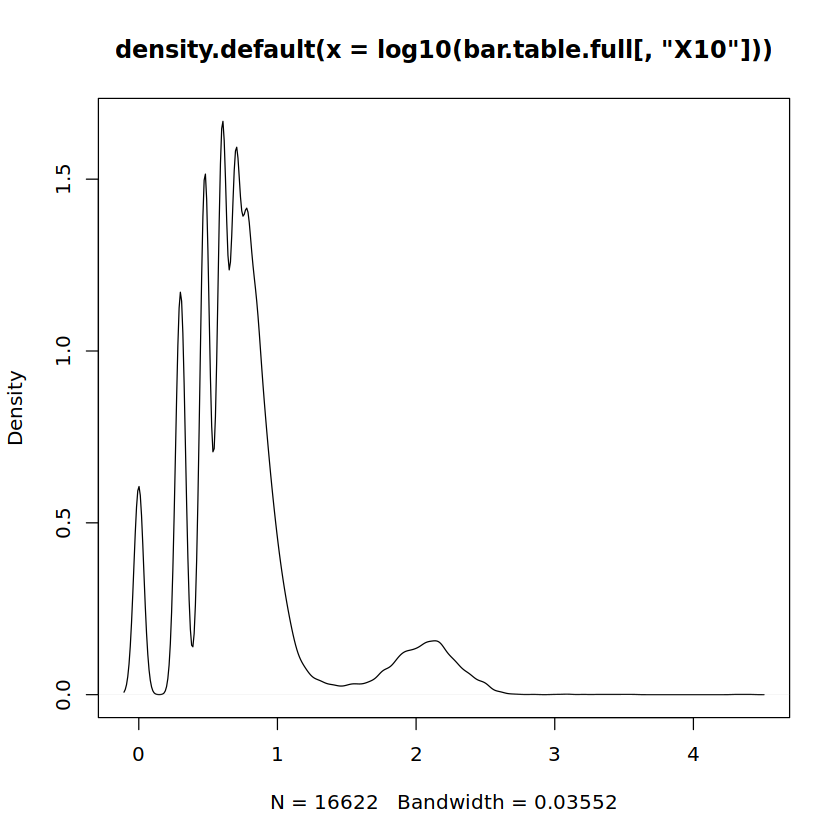

In [144]:
plot(density(log10(bar.table.full[,"X10"])))

In [114]:
# get quantiles for each column
barcode_quantile = bar.table.full
for (x in colnames(barcode_quantile)) {
    ecdf_fun = ecdf(barcode_quantile[x][,1])
    barcode_quantile[x] = sapply(barcode_quantile[x][,1], ecdf_fun)
}

In [246]:
cell = "AAACGAATCGAGAATA"
final.calls[cell]
bar.table.full[cell,]
barcode_quantile[cell,]

AAACGAATCGAGAATA 
       "Doublet"

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACGAATCGAGAATA,13,26,42,21,55,43,14,23,213,17,12,16


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACGAATCGAGAATA,0.7630851,0.9050054,0.9147515,0.8847912,0.9407412,0.8660811,0.9200457,0.9140898,0.9842979,0.8589821,0.885092,0.8625917


In [298]:
bar.table[names(final.calls[final.calls == "X0"]),]

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCCACAACCAACT,43,17,12,6,5,28,2,6,4,7,4,8
AAACCCAGTTGGGTTT,199,10,18,12,4,17,6,12,13,7,1,7
AAACGAAGTCTTCTAT,190,5,12,14,7,21,8,8,9,5,2,7
AAACGCTCATGTACGT,123,16,24,16,7,31,10,12,11,10,4,10
AAAGAACGTATGAAGT,101,8,10,6,1,6,3,7,8,3,7,2
AAAGGATCACCGCTAG,69,11,14,10,5,24,4,9,13,10,3,13
AAAGGATCAGTCTCTC,60,11,13,9,1,20,3,14,7,4,6,7
AAAGGATCATCGATGT,253,14,20,7,4,23,3,7,3,8,2,11
AAAGGATTCAAACTGC,143,10,21,12,4,15,6,6,8,6,2,9


In [299]:
## Perform semi-supervised negative cell reclassification
reclass.cells <- findReclassCells(bar.table.full, names(final.calls)[which(final.calls=="Negative")])
reclass.res <- rescueCells(bar.table.full, final.calls, reclass.cells)

[1] "Normalizing barode data..."
[1] "Pre-allocating data structures..."
[1] "Determining classifications for negative cells across all BCs, all q..."
[1] "Computing classification stability..."
[1] "Extracting rescued classifications..."
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 1

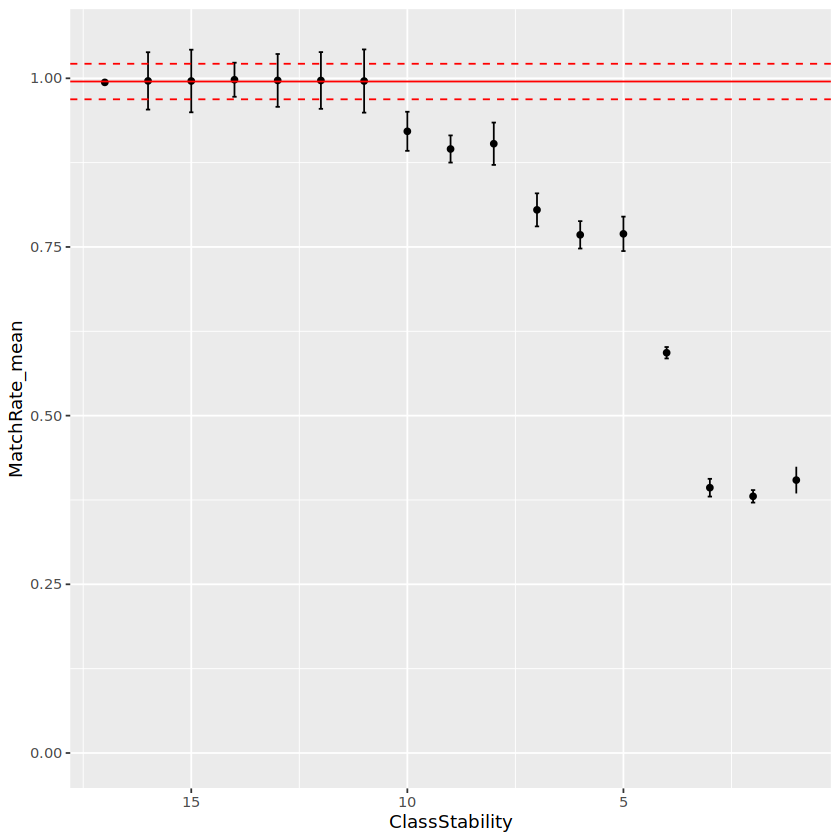

In [300]:
## Visualize Results
ggplot(reclass.res[-1, ], aes(x=ClassStability, y=MatchRate_mean)) + 
    geom_point() + xlim(c(nrow(reclass.res)-1,1)) + 
    ylim(c(0,1.05)) +
    geom_errorbar(aes(ymin=MatchRate_mean-MatchRate_sd, ymax=MatchRate_mean+MatchRate_sd), width=.1) +
    geom_hline(yintercept = reclass.res$MatchRate_mean[1], color="red") +
    geom_hline(yintercept = reclass.res$MatchRate_mean[1]+3*reclass.res$MatchRate_sd[1], color="red",lty=2) +
    geom_hline(yintercept = reclass.res$MatchRate_mean[1]-3*reclass.res$MatchRate_sd[1], color="red",lty=2)

In [301]:
## Finalize negative cell rescue results
final.calls.rescued <- final.calls
rescue.ind <- which(reclass.cells$ClassStability >= 11) ## Note: Value will be dataset-specific
final.calls.rescued[rownames(reclass.cells)[rescue.ind]] <- reclass.cells$Reclassification[rescue.ind]

In [302]:
table(final.calls.rescued)

final.calls.rescued
 Doublet Negative       X0       X1      X10      X11       X2       X3 
    2363      376     1482     1025     1013     1170      918     1081 
      X4       X5       X6       X7       X8       X9 
     967     1196      703      848     1083      830 

In [303]:
bar.table.full[names(final.calls.rescued[final.calls.rescued == "Doublet"]),]

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCCATCATGTCTT,4,1,11,5,3,14,4,133,3,6,49,5
AAACGAAAGCTCGCAC,7,13,16,14,22,41,4,15,6,16,52,15
AAACGAAAGGGCGAGA,24,254,35,17,11,46,13,22,28,13,8,11
AAACGAACAGGTGGAT,14,20,21,20,12,38,13,14,16,232,19,25
AAACGAAGTAGGCTGA,8,12,11,11,6,28,6,11,7,90,139,4
AAACGAATCGAGAATA,13,26,42,21,55,43,14,23,213,17,12,16
AAACGCTGTGCCCACA,11,10,12,12,2,227,125,8,3,6,2,5
AAACGCTGTTCCCAAA,67,13,24,6,7,22,2,8,11,8,7,178
AAACGCTTCGAGAACG,9,13,427,10,6,36,49,13,13,4,3,12


In [304]:
# reclassify doublets?
## Perform semi-supervised negative cell reclassification
reclass.cells <- findReclassCells(bar.table.full, names(final.calls.rescued)[which(final.calls.rescued=="Doublet")])
reclass.res <- rescueCells(bar.table.full, final.calls.rescued, reclass.cells)

[1] "Normalizing barode data..."
[1] "Pre-allocating data structures..."
[1] "Determining classifications for negative cells across all BCs, all q..."
[1] "Computing classification stability..."
[1] "Extracting rescued classifications..."
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 1

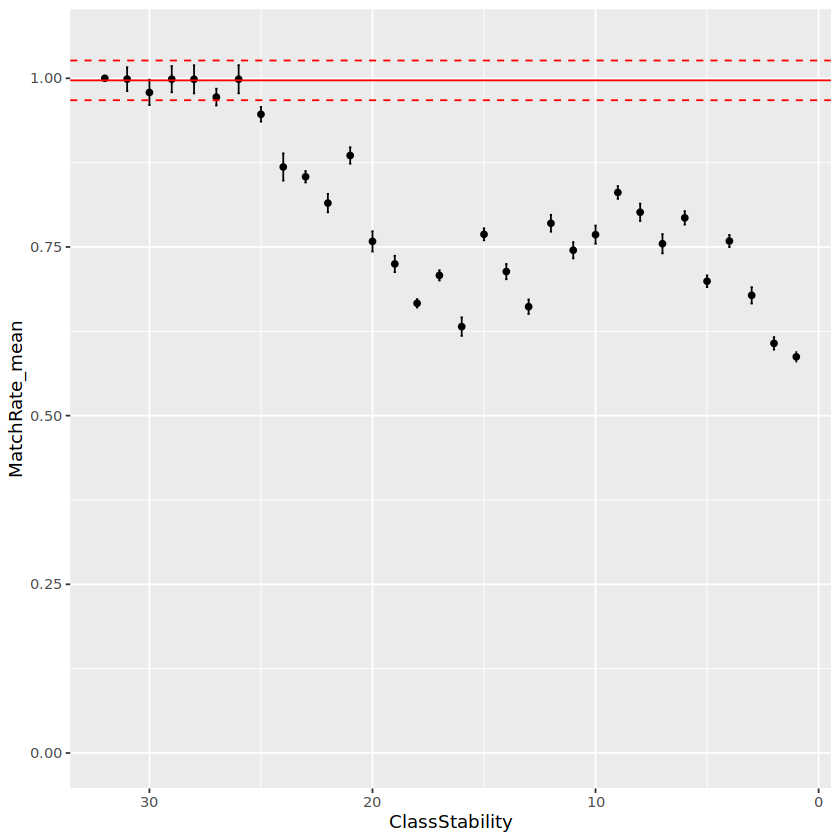

In [305]:
## Visualize Results
ggplot(reclass.res[-1, ], aes(x=ClassStability, y=MatchRate_mean)) + 
    geom_point() + xlim(c(nrow(reclass.res)-1,1)) + 
    ylim(c(0,1.05)) +
    geom_errorbar(aes(ymin=MatchRate_mean-MatchRate_sd, ymax=MatchRate_mean+MatchRate_sd), width=.1) +
    geom_hline(yintercept = reclass.res$MatchRate_mean[1], color="red") +
    geom_hline(yintercept = reclass.res$MatchRate_mean[1]+3*reclass.res$MatchRate_sd[1], color="red",lty=2) +
    geom_hline(yintercept = reclass.res$MatchRate_mean[1]-3*reclass.res$MatchRate_sd[1], color="red",lty=2)

In [306]:
## Finalize doublet cell rescue results
final.calls.rescued2 <- final.calls.rescued
rescue.ind <- which(reclass.cells$ClassStability >= 26) ## Note: Value will be dataset-specific
final.calls.rescued2[rownames(reclass.cells)[rescue.ind]] <- reclass.cells$Reclassification[rescue.ind]
table(final.calls.rescued2)

final.calls.rescued2
 Doublet Negative       X0       X1      X10      X11       X2       X3 
    2105      376     1518     1050     1037     1194      947     1104 
      X4       X5       X6       X7       X8       X9 
     993     1243      704      870     1084      830 

In [308]:
final.calls.rescued2["AAATGGATCTATGTGG"]

AAATGGATCTATGTGG 
            "X4"

In [307]:
head(bar.table.full[names(final.calls.rescued[final.calls.rescued2 != "Doublet" & final.calls.rescued == "Doublet"]),])

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACGAAAGGGCGAGA,24,254,35,17,11,46,13,22,28,13,8,11
AAAGAACAGTTGAAAC,11,206,17,9,10,30,4,16,55,9,5,6
AAATGGATCTATGTGG,17,22,46,18,101,40,7,22,13,13,7,19
AACCAACGTTCAAACC,4,5,448,7,4,26,2,9,74,5,3,9
AACCATGGTCGGCCTA,12,11,274,17,7,30,3,9,81,54,9,8
AAGACTCTCACAGAGG,9,12,18,10,99,28,8,6,77,1,6,5


In [311]:
write.csv(as.data.frame(final.calls.rescued2), "230414_bd391_cell_classifications.csv")